# Помощь маркетологам в снижении расходов, выяснение невыгодных источников трафика и перераспределение бюджета

Заказчик - отдел маркетинга крупного интернет-магазина.  

Цель: приоритизировать список гипотез, запустить A/B-тест и проанализировать результаты. 

Задачи: 
        
        Приоритизировать гипотезы с применением фреймворков ICE и ICE, 
        Построить графики кумулятивных показателей
        Посчитать значимые перцентили
        Посчитать статистическую значимость различий по разным параметрам
        Принять решение по результатам теста


In [1]:
# установим необходимые библиотеки

import pandas as pd
import numpy as np
import math
from scipy import stats as st
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## Приоритизация гипотез

### Посмотрим таблицу hypothesis

In [2]:
# посмотрим таблицу

hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
# посмотрим на объем и типы данных в таблице

hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Таблица не имеет пропусков, все данные нужного типа.

In [4]:
# для удобства отображения, присвоим каждой гипотезе порядковый номер

hypothesis = hypothesis.reset_index()
hypothesis = hypothesis.rename(columns={'index':'Hypothesis_num'})
hypothesis['Hypothesis_num'] = hypothesis['Hypothesis_num'].map(lambda x: x+1)


In [5]:
#  посмотрим на табличку еще раз
hypothesis

,Hypothesis_num,Hypothesis,Reach,Impact,Confidence,Efforts
0,1,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,2,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,3,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,4,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,5,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,6,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,7,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,8,Добавить форму подписки на все основные страни...,10,7,8,5
8,9,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Для удобства отображения гипотез, каждой присвоили порядковый номер, далее будем анализировать номера самых приоритетных из них.

### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [6]:
# Посмотрим на гипотезы, для этого нужно увеличить количество символов в записи

pd.set_option('display.max_colwidth', 150)

hypothesis[['Hypothesis_num','Hypothesis']]


,Hypothesis_num,Hypothesis
0,1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
1,2,"Запустить собственную службу доставки, что сократит срок доставки заказов"
2,3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
3,4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
4,5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"
5,6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
6,7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
7,8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
8,9,"Запустить акцию, дающую скидку на товар в день рождения"


In [7]:
# Вернем ограничение на количество символов в записи, чтобы не загромождать вывод

pd.set_option('display.max_colwidth', 50)

ICE (impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач. ICE рассчитывается по формуле:

\begin{equation*}
\ ICE = \frac{Impact * Confidence}{Efforts}
\end{equation*}

In [8]:
# добавим столбец ICE

hypothesis['ICE'] =hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis[['Hypothesis_num','ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis_num,ICE
8,9,16.200000
0,1,13.333333
7,8,11.200000
6,7,8.000000
2,3,7.000000
1,2,2.000000
5,6,1.333333
3,4,1.125000
4,5,1.000000


По показателю ICE лидируют гипотезы № 9,1,8 

### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

Фреймворк RICE отличается от ICE еще одним компонентом Reach — количество пользователей которых затронет планируемое изменение. RICE рассчитывается по формуте

\begin{equation*}
\ RICE = \frac{Rearch * Impact * Confidence}{Efforts}
\end{equation*}

In [9]:
hypothesis['RICE'] =hypothesis['ICE'] * hypothesis['Reach']
hypothesis[['Hypothesis_num','RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis_num,RICE
7,8,112.0
2,3,56.0
0,1,40.0
6,7,40.0
8,9,16.2
3,4,9.0
1,2,4.0
5,6,4.0
4,5,3.0


По показателю RICE лидируют гипотезы № 8, 3, 1 и 7 

In [10]:
hyp1=hypothesis[['Hypothesis_num','ICE']]
hyp1['mark']='ICE'
hyp1=hyp1.rename(columns={'ICE':'values'})
hyp2=hypothesis[['Hypothesis_num','RICE']]
hyp2['mark']='RICE'
hyp2=hyp2.rename(columns={'RICE':'values'})

hyp = pd.concat([hyp1, hyp2], axis=0)
hyp

,Hypothesis_num,values,mark
0,1,13.333333,ICE
1,2,2.000000,ICE
2,3,7.000000,ICE
3,4,1.125000,ICE
4,5,1.000000,ICE
5,6,1.333333,ICE
6,7,8.000000,ICE
7,8,11.200000,ICE
8,9,16.200000,ICE
0,1,40.000000,RICE


In [11]:
hyp_pivot=hyp.groupby(['Hypothesis_num', 'mark'], as_index=False).agg({'values':'sum'})

hyp_pivot

,Hypothesis_num,mark,values
0,1,ICE,13.333333
1,1,RICE,40.000000
2,2,ICE,2.000000
3,2,RICE,4.000000
4,3,ICE,7.000000
5,3,RICE,56.000000
6,4,ICE,1.125000
7,4,RICE,9.000000
8,5,ICE,1.000000
9,5,RICE,3.000000


Посмотрим изменение на графике:

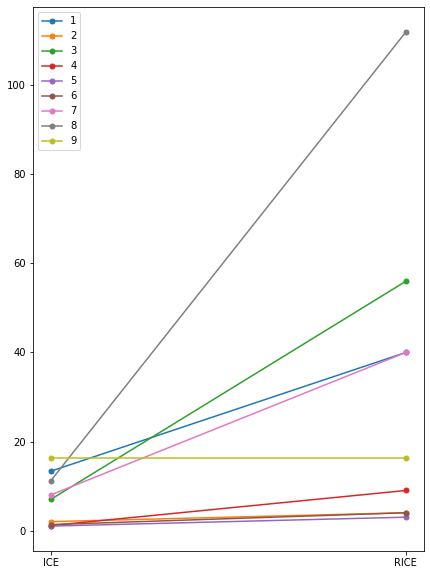

In [12]:
Hypothesis_list = hyp_pivot['Hypothesis_num'].unique() 
# colors = ['red', 'blue', 'yellow', 'pink', 'green', 'brawn', 'dark-blue', 'purple', 'orange']

fig, ax = plt.subplots(1, figsize=(7,10))
for i in Hypothesis_list:
    # get a single hypothesis from the list
    temp = hyp_pivot[hyp_pivot['Hypothesis_num'] == i]
    # plot the lines
    plt.plot(temp['mark'], temp['values'], marker='o', markersize=5, label = i)   

    
plt.xticks(['ICE', 'RICE'])
plt.legend()                  
plt.show()

ВЫВОДЫ
        
По показателю RICE лидирует гипотеза № 8 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок), поскольку она охватывает всех пользователей и имеет максимальный показатель Reach.

Гипотеза №3 (Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа) также поднялась по показателю RICE на 2е место за счет высокого охвата пользователей. 

Гипотеза №9, имеющаю максимальный показатель ICE, наоборот, охватывает минимальный круг пользователей (в нашем случае - только именинников), поэтому с учетом компонента Reach, скатывается на 5 по приоритету по показателю RICE. 

Гипотеза №1 (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей) входит в тройку лидеров по обоим показателям. 

   

## Анализ A/B-теста

###  посмотрим таблицы с информацией о заказах и визитах

In [13]:
# посмотрим таблицу orders_log c информацией о заказах

orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [14]:
# посмотрим на объем и типы данных в таблице

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [15]:
# столбец с датами имеет строковый тип данных, нужно исправить

orders['date'] = orders['date'].astype('datetime64[D]')

In [16]:
# Проверим наличие дубликатов 

orders.duplicated().sum()

0

In [17]:
a_ID=orders[orders['group']=='A']['visitorId'].unique()
b_ID=orders[orders['group']=='B']['visitorId'].unique()
common_id = [x for x in b_ID if x in a_ID]
len(common_id)

58

58 пользователей оказались сразу в двух группах, для исключения ошибок их нужно удалить из анализируемых данных.

In [18]:
orders=orders.query('visitorId not in @common_id')

In [19]:
# посмотрим таблицу visits_log с информацией о посещениях сайта

visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [20]:
# посмотрим на объем и типы данных в таблице

visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [21]:
# столбец с датами имеет строковый тип данных, нужно исправить

visitors['date'] = visitors['date'].astype('datetime64[D]')

In [22]:
# Проверим наличие дубликатов 

visitors.duplicated().sum()

0


Данные чистые, можно работать.

#### Построим график кумулятивной выручки по группам

In [23]:
# создаем массив уникальных пар значений дат и групп теста

dates_groups = orders[['date','group']].drop_duplicates() 

In [24]:
# Соберём агрегированные кумулятивные по дням и группам данные о заказах

orders_aggregated = dates_groups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date':'max', 'group':'max', 'visitorId':'nunique', 'transactionId':'nunique', 'revenue':'sum'}), axis=1).sort_values(by=['date','group']) 
    
orders_aggregated.head()

,date,group,visitorId,transactionId,revenue
55,2019-08-01,A,19,23,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,36,42,234381
173,2019-08-02,B,39,40,221801
291,2019-08-03,A,60,66,346854


In [25]:
# Соберём агрегированные кумулятивные по дням и группам данные о визитах

visits_aggregated=dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1).sort_values(by=['date','group'])

visits_aggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [26]:
# объединяем кумулятивные данные в одну таблицу

cumulative=visits_aggregated.merge(orders_aggregated, on=['date', 'group'])
cumulative.columns = ['date', 'group', 'visitors', 'buyers', 'orders', 'revenue']

cumulative.head()

,date,group,visitors,buyers,orders,revenue
0,2019-08-01,A,719,19,23,142779
1,2019-08-01,B,713,17,17,59758
2,2019-08-02,A,1338,36,42,234381
3,2019-08-02,B,1294,39,40,221801
4,2019-08-03,A,1845,60,66,346854


Построим графики кумулятивной выручки по дням и группам A/B-тестирования: 

In [27]:
# разделим данные по группам

cumulative_rev_A=cumulative.query('group == "A"')

cumulative_rev_B=cumulative.query('group == "B"')

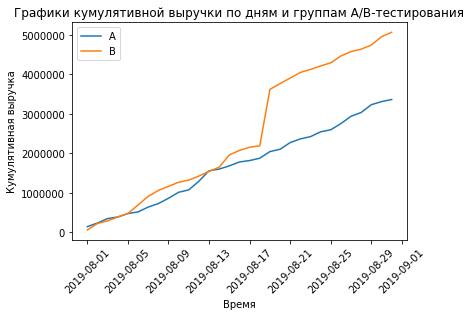

In [28]:
# Построим графики кумулятивной выручки по дням и группам A/B-тестирования: 
    
plt.plot(cumulative_rev_A['date'], cumulative_rev_A['revenue'], label='A')
plt.plot(cumulative_rev_B['date'], cumulative_rev_B['revenue'], label='B')
plt.legend()
plt.title('Графики кумулятивной выручки по дням и группам A/B-тестирования')
plt.xlabel("Время")
plt.ylabel("Кумулятивная выручка")
plt.xticks(rotation = 45)
plt.show()

Выручка почти равномерно увеличивается в течение всего теста.

Группа В показывает лучшие результаты, однако в одной точке график В резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогого заказа в выборке. Необходимо будет обратить на это внимание.


#### Построим график кумулятивного среднего чека по группам

Кумулятивный средний чек - это частное от деления кумулятивной выручки на кумулятивное число заказов

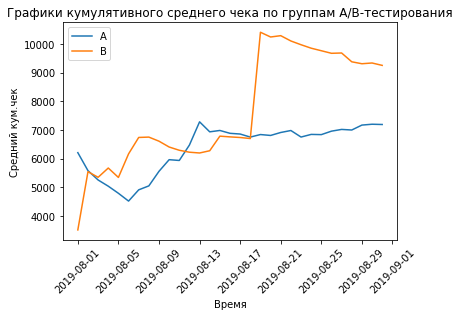

In [29]:
# Построим графики среднего чека по группам 

plt.plot(cumulative_rev_A['date'], cumulative_rev_A['revenue']/cumulative_rev_A['orders'], label='A')
plt.plot(cumulative_rev_B['date'], cumulative_rev_B['revenue']/cumulative_rev_B['orders'], label='B')
plt.legend()
plt.title('Графики кумулятивного среднего чека по группам A/B-тестирования')
plt.xlabel("Время")
plt.ylabel("Средний кум.чек")
plt.xticks(rotation = 45)
plt.show()

Средний чек становится равномерным ближе к концу теста: установился для группы A и продолжает снижаться для группы B. 

Кроме того, в группе В заметен резкий всплеск, который может означать крупные заказы. Тогда группе В нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

In [30]:
# собираем данные в одном датафрейме с группировкой по дате

cumulativeAB = cumulative_rev_A.merge(cumulative_rev_B, on='date', suffixes=['A', 'B'])
cumulativeAB.head()

,date,groupA,visitorsA,buyersA,ordersA,revenueA,groupB,visitorsB,buyersB,ordersB,revenueB
0,2019-08-01,A,719,19,23,142779,B,713,17,17,59758
1,2019-08-02,A,1338,36,42,234381,B,1294,39,40,221801
2,2019-08-03,A,1845,60,66,346854,B,1803,53,54,288850
3,2019-08-04,A,2562,71,77,388030,B,2573,66,68,385740
4,2019-08-05,A,3318,92,99,474413,B,3280,87,89,475648


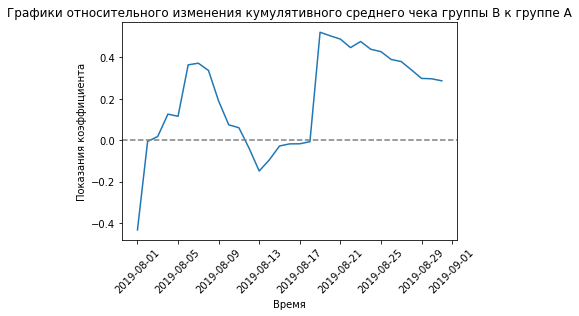

In [31]:
plt.plot(cumulativeAB['date'], (cumulativeAB['revenueB']/cumulativeAB['ordersB'])/(cumulativeAB['revenueA']/cumulativeAB['ordersA'])-1)
plt.axhline(y=0, color='grey', linestyle='--')
# plt.legend()
plt.title('Графики относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel("Время")
plt.ylabel("Показания коэффициента")
plt.xticks(rotation = 45)
plt.show()

Скачки относительного кумулятивного среднего чека снова говорят о крупных покупках, в целом можно говорить о том, что средний кумулятивный чек по группе В все-таки устанавливается выше группы А.

#### Построим график кумулятивной конверсии по группам

In [32]:
# считаем кумулятивную конверсию по группам 

cumulative_rev_A['conversion']=cumulative_rev_A['orders']/cumulative_rev_A['visitors']
cumulative_rev_B['conversion']=cumulative_rev_B['orders']/cumulative_rev_B['visitors']

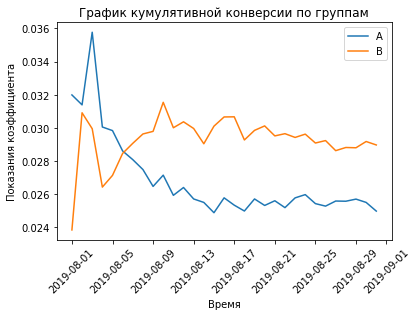

In [33]:
# строим график кумулятивной конверсии по группам

plt.plot(cumulative_rev_A['date'], cumulative_rev_A['conversion'], label='A')
plt.plot(cumulative_rev_B['date'], cumulative_rev_B['conversion'], label='B')
plt.legend()

plt.title('График кумулятивной конверсии по группам')
plt.xlabel("Время")
plt.ylabel("Показания коэффициента")
plt.xticks(rotation = 45)
plt.show()


Конверсия группы В довольно уверенно вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

#### Построим график относительного изменения кумулятивной конверсии группы B к группе A

In [34]:
# считаем кумулятивную конверсию по группам в сводном файле 

cumulativeAB['conversionA']=cumulativeAB['ordersA']/cumulativeAB['visitorsA']
cumulativeAB['conversionB']=cumulativeAB['ordersB']/cumulativeAB['visitorsB']

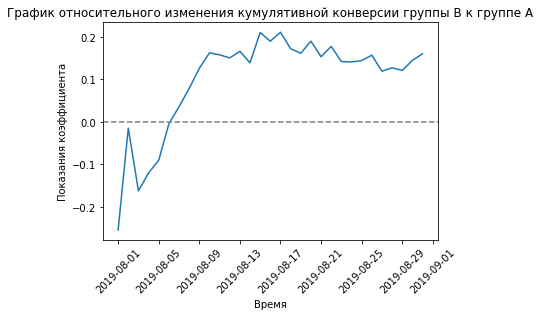

In [35]:
# строим график относительного изменения кумулятивной конверсии группы B к группе A

plt.plot(cumulativeAB['date'], cumulativeAB['conversionB']/cumulativeAB['conversionA']-1)
# plt.legend()
plt.axhline(y=0, color = 'grey', linestyle='--')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel("Время")
plt.ylabel("Показания коэффициента")
plt.xticks(rotation = 45)
plt.show()

В начале теста группа B несколько проигрывала группе A, затем вырвалась вперёд. В целом можно утверждать, что отношение конверсии установилось в пользу группы В

#### Построим точечный график количества заказов по пользователям и найдем нетипичных

In [36]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [37]:
orders_by_user=orders.groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
orders_by_user.columns = ['user','orders']
orders_by_user.sort_values(by='orders', ascending=False).head()

,user,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


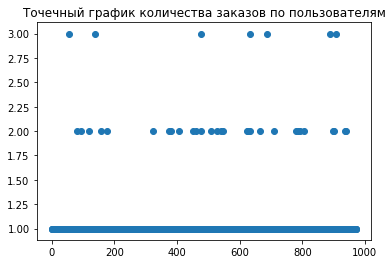

In [38]:
# серия из чисел от 0 до количества наблюдений в orders_by_user

x_values = pd.Series(range(0, len(orders_by_user)))

# Построим точечный график количества заказов по пользователям

plt.scatter(x_values, orders_by_user['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.show()


Подавляющее большинство пользователей сделало 1 заказ, есть те, кто делал по 2 и 3 заказа. Это нетипичное поведение клиентов.


Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [39]:
np.percentile(orders_by_user['orders'], [90, 95, 99])

array([1., 1., 2.])

Не более 1% совершали более 2х заказов. Поэтому покупателей,сделавших 2 и более покупки можно считать нетипичными.

#### Построим точечный график стоимостей заказов и найдем нетипичные

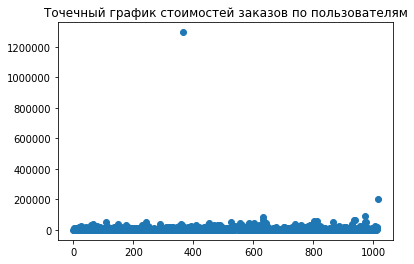

In [40]:
# серия из чисел от 0 до количества наблюдений в orders_by_user

x_values = pd.Series(range(0, len(orders)))

# Построим точечный график количества заказов по пользователям

plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов по пользователям')
plt.show()

Подавляющее большинство заказов не дороже 50000 рублей, однако есть заказ более чем на 1,2 млн. это точно не типичный заказ, который портит картину. 

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [41]:
np.percentile(orders['revenue'], [90, 95, 99])

array([17990., 26785., 53904.])

Не больше 5% заказов дороже 27000 рублей и не более 1% дороже 54000 рублей. Поэтому покупки дороже 30000 рублей можно считать нетипичными.

#### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным

Подготовим данные для расчетов

In [42]:
# вспомним табличку

orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [43]:
# найдем количество заказов и поступлений в день по каждой группе 

orders_daily_A=orders.query('group =="A"').groupby('date', as_index=False).agg({'revenue':'sum', 'visitorId':'nunique'})
orders_daily_A.columns = ['date', 'rev_PerDate_A', 'orders_PerDate_A']
orders_daily_B=orders.query('group =="B"').groupby('date', as_index=False).agg({'revenue':'sum', 'visitorId':'nunique'})
orders_daily_B.columns = ['date', 'rev_PerDate_B', 'orders_PerDate_B']
orders_daily = orders_daily_A.merge(orders_daily_B, on='date')
orders_daily.head()

,date,rev_PerDate_A,orders_PerDate_A,rev_PerDate_B,orders_PerDate_B
0,2019-08-01,142779,19,59758,17
1,2019-08-02,91602,18,162043,22
2,2019-08-03,112473,24,67049,14
3,2019-08-04,41176,11,96890,13
4,2019-08-05,86383,22,89908,21


In [44]:
# вспомним табличку

visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [45]:
# найдем количество посетителей в день по каждой группе 

visit_daily_A=visitors.query('group =="A"')[['date', 'visitors']]
visit_daily_A.columns = ['date', 'visit_PerDate_A']
visit_daily_B=visitors.query('group =="B"')[['date', 'visitors']]
visit_daily_B.columns = ['date', 'visit_PerDate_B']
visit_daily = visit_daily_A.merge(visit_daily_B, on='date')
visit_daily.head()

,date,visit_PerDate_A,visit_PerDate_B
0,2019-08-01,719,713
1,2019-08-02,619,581
2,2019-08-03,507,509
3,2019-08-04,717,770
4,2019-08-05,756,707


In [46]:
# сведем данные в одну таблицу

data=cumulativeAB.merge(visit_daily, on = 'date')
data=data.merge(orders_daily, on='date')

In [47]:
data.head()

,date,groupA,visitorsA,buyersA,ordersA,revenueA,groupB,visitorsB,buyersB,ordersB,revenueB,conversionA,conversionB,visit_PerDate_A,visit_PerDate_B,rev_PerDate_A,orders_PerDate_A,rev_PerDate_B,orders_PerDate_B
0,2019-08-01,A,719,19,23,142779,B,713,17,17,59758,0.031989,0.023843,719,713,142779,19,59758,17
1,2019-08-02,A,1338,36,42,234381,B,1294,39,40,221801,0.031390,0.030912,619,581,91602,18,162043,22
2,2019-08-03,A,1845,60,66,346854,B,1803,53,54,288850,0.035772,0.029950,507,509,112473,24,67049,14
3,2019-08-04,A,2562,71,77,388030,B,2573,66,68,385740,0.030055,0.026428,717,770,41176,11,96890,13
4,2019-08-05,A,3318,92,99,474413,B,3280,87,89,475648,0.029837,0.027134,756,707,86383,22,89908,21


Создадим переменные orders_ByUsers_A и orders_ByUsers_B со столбцами 'userId', 'orders'. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов

In [48]:
# вспомним таблицу

orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [49]:
# создатим таблицу заказов на каждого пользователя группы А

orders_ByUsers_A = orders.query('group == "A"').groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
orders_ByUsers_A.columns = ['userId', 'orders']

In [50]:
# создатим таблицу заказов на каждого пользователя группы В

orders_ByUsers_B = orders.query('group == "B"').groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
orders_ByUsers_B.columns = ['userId', 'orders']

In [51]:
# Добавим нули для пользователей, которые зашли, но ничего не заказывали

sampleA=pd.concat([orders_ByUsers_A['orders'], pd.Series(0, index=np.arange(data['visit_PerDate_A'].sum()- len(orders_ByUsers_A['orders'])), name='orders')],axis=0)
sampleB=pd.concat([orders_ByUsers_B['orders'], pd.Series(0, index=np.arange(data['visit_PerDate_B'].sum()- len(orders_ByUsers_B['orders'])), name='orders')],axis=0)

Проверим выборки критерием Манна-Уитни

Сформулируем гипотезу H0 (нулевая гипотеза):

- Выборки одинаковые, статистически значимых различий в конверсии между группами нет.

Сформулируем гипотезу H1 (альтернативная гипотеза):

- Выборки отличаются, есть статистически значимые различий в конверсии между группами.

In [52]:
print("p_value = {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1], alternative="two-sided"))

print("Относительный прирост конверсии группы B = {:.1%}".format(sampleB.mean() / sampleA.mean() - 1))


p_value = 0.006
Относительный прирост конверсии группы B = 16.0%


По «сырым» данным различия в конверсии групп A и B наблюдаются.

p-value = 0.006, меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, следует отвергнуть. 

Относительный выигрыш группы B равен 16%.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезу H0 (нулевая гипотеза):

- Выборки одинаковые, статистически значимых различий в среднем чеке между группами нет.

Сформулируем гипотезу H1 (альтернативная гипотеза):

- Выборки отличаются, есть статистически значимые различий в среднем чеке между группами.

Передадим критерию mannwhitneyu() данные о выручке с заказов. 
А ещё найдём относительные различия в среднем чеке между группами

In [53]:
print("p_value = {0:.3f}".format(st.mannwhitneyu(orders.query('group == "A"')['revenue'], orders.query('group == "B"')['revenue'])[1], alternative="two-sided"))

print("относительные различия в среднем чеке = {:.1%}".format(orders.query('group == "B"')['revenue'].mean() / orders.query('group == "A"')['revenue'].mean() - 1))

p_value = 0.415
относительные различия в среднем чеке = 28.7%


P-value значительно больше 0,05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

Однако, средний чек группы B значительно выше среднего чека группы A - на 28,7%

#### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным

Найденные выше 95-й и 99-й перцентили количества заказов на пользователя поазали, что не более 1% совершали более 2х заказов. Поэтому покупателей,сделавших 2 и более покупки можно считать нетипичными.

Также нетипичными являются покупки дороже 30000 рублей можно считать нетипичными. 


In [54]:
# #  соберем аномальных пользователей с большим кодичеством заказов

# atypical_order=pd.concat([orders_ByUsers_A.query('orders >= 3')['userId'], orders_ByUsers_B.query('orders >= 3')['userId']], axis=0)

# # добавим тех, кто купил на большую сумму

# atypical = pd.concat([atypical_order, orders.query('revenue > 50000')['visitorId']], axis=0)

# print('Нетипичных пользователей', atypical.shape)

Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [55]:
# создатим список заказов на каждого пользователя групп А и В с учетом посетителей, которые ничего не купили.

sampleA_clean=pd.concat([orders_ByUsers_A.query('orders >= 2')['orders'], pd.Series(0, index=np.arange(data['visit_PerDate_A'].sum()- len(orders_ByUsers_A['orders'])), name='orders')],axis=0)
sampleB_clean=pd.concat([orders_ByUsers_B.query('orders >= 2')['orders'], pd.Series(0, index=np.arange(data['visit_PerDate_B'].sum()- len(orders_ByUsers_B['orders'])), name='orders')],axis=0)

Проверим выборки критерием Манна-Уитни

Сформулируем гипотезу H0 (нулевая гипотеза):

- Выборки одинаковые, статистически значимых различий в конверсии между группами нет.

Сформулируем гипотезу H1 (альтернативная гипотеза):

- Выборки отличаются, есть статистически значимые различий в конверсии между группами.

In [56]:
print("p_value = {0:.3f}".format(st.mannwhitneyu(sampleA_clean, sampleB_clean)[1], alternative="two-sided"))

print("Относительный прирост конверсии группы B = {:.1%}".format(sampleB_clean.mean() / sampleA_clean.mean() - 1))

p_value = 0.493
Относительный прирост конверсии группы B = -7.8%


По «чистым» данным различия в конверсии групп A и B не наблюдаются.

p-value = 0.493, больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергнуть нельзя. 

Группа B уступает группе А по конверсии на 7,8%.

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Проверим, как изменятся результаты по среднему чеку

Сформулируем гипотезу H0 (нулевая гипотеза):

- Выборки одинаковые, статистически значимых различий в среднем чеке между группами нет.

Сформулируем гипотезу H1 (альтернативная гипотеза):

- Выборки отличаются, есть статистически значимые различий в среднем чеке между группами.

In [57]:

print('p_value = {0:.3f}'.format(st.mannwhitneyu(orders.query('revenue > 30000 | group == "A"')['revenue'], orders.query('revenue > 30000 | group == "B"')['revenue'])[1], alternative="two-sided"))

print("относительные различия в среднем чеке = {:.1%}".format(orders.query('revenue > 30000 | group == "B"')['revenue'].mean()/orders.query('revenue > 30000 | group == "A"')['revenue'].mean()-1))


p_value = 0.292
относительные различия в среднем чеке = -8.8%


P-value значительно больше 0,05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

После очистки данных однако, средний чек группы B стал ниже среднего чека группы A - на 8,8%

## ВЫВОДЫ 



### В первой части работы мы приоритизировали гипотезы.
    
**По показателю ICE лидируют гипотезы №**
    9 - Запустить акцию, дающую скидку на товар в день рождения
    1 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
    8 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

**Однако применив компонент Reach и приоритизировав гипотезы по показателю RICE, видим в лидерах гипотезы:**
    8 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
    3 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
    1 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
    7 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
    
   По показателю RICE лидирует гипотеза № 8, поскольку она охватывает всех пользователей и имеет максимальный показатель Reach.
Гипотеза №3 также поднялась по показателю RICE на 2е место за счет высокого охвата пользователей. 

Гипотеза №9, имеющаю максимальный показатель ICE, наоборот, охватывает минимальный круг пользователей, поэтому с учетом компонента Reach, скатывается на 5 по приоритету по показателю RICE. 

Гипотеза №1 входит в тройку лидеров по обоим показателям.


### Во второй части работы мы провели анализ результатов А/В теста

График кумулятивной выручки по группам показал, что выручка почти равномерно увеличивается в течение всего теста.
Группа В показывает лучшие результаты, однако в одной точке график В резко растет, что может сигнализировать о всплесках числа заказов, либо о появлении очень дорогого заказа в выборке. 

График кумулятивного среднего чека по группам показал, что средний чек становится равномерным ближе к концу теста: установился для группы A и продолжает снижаться для группы B. Кроме того, в группе В заметен резкий всплеск, который может означать крупные заказы. 


График относительного изменения кумулятивного среднего чека группы B к группе A показал скачки относительного кумулятивного среднего чека, что снова говорят о крупных покупках, в целом можно говорить о том, что средний кумулятивный чек по группе В все-таки устанавливается выше группы А. 

График кумулятивной конверсии по группам показал, что конверсия группы В довольно уверенно вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.


График относительного изменения кумулятивной конверсии группы B к группе A показал, что сначала группа B несколько проигрывала группе A, затем вырвалась вперёд. В целом можно утверждать, что отношение конверсии установилось в пользу группы В.


Точечный график количества заказов по пользователям показал, что подавляющее большинство пользователей сделало 1 заказ, есть те, кто делал по 2 заказа. Однако на графике видны выбросы в виде пользователей, сделавших 8, 9, 11 заказов. Это нетипичное поведение клиентов.

Подсчет 95-го и 99-го перцентилей количества заказов на пользователя показал, что не более 5% совершали более 2х заказов и не более 1% пользователей сделали больше 4 покупок. Поэтому покупателей,сделавших 3 и более покупки можно считать нетипичными.

Точечный график стоимостей заказов показал, что подавляющее большинство заказов не дороже 50000 рублей, однако есть заказ более чем на 1,2 млн. это точно не типичный заказ, который портит картину. Это нетипичное поведение клиентов.

Подсчет 95-го и 99-го перцентилей количества заказов на пользователя показал, что не больше 5% заказов дороже 27000 рублей и не более 1% дороже 54000 рублей. Поэтому покупки дороже 30000 рублей можно считать нетипичными.
 
Подсчет статистической значимости различий в конверсии между группами по «сырым» данным показал, что различия в конверсии групп A и B наблюдаются. p-value = 0.006, меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, следует отвергнуть. Относительный выигрыш группы B равен 16%.

Подсчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным показал р-value значительно больше 0,05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Хотя, средний чек группы B значительно выше среднего чека группы A - на 28,7%

Подсчет статистической значимости различий в конверсии между группами по «очищенным» данным показал, что различия в конверсии групп A и B не наблюдаются. p-value = 0.493, больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергнуть нельзя. Группа B уступает группе А по конверсии на 7,8%.

Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным показал, что P-value значительно больше 0,05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. После очистки данных, средний чек группы B стал ниже среднего чека группы A - на 8,8%


### Решение: остановить тест, зафиксировать отсутствие различий между группами

По графикам кумулетивных показателей мы наблюдаем стабилизацию показателей, только относительный кумулятивный средний чек продолжает снижаться. Таким образом при отсутствии новых аномальных значений нет оснований полагать, что ситуация изменится, продолжать тест не имеет смысла.

По неочищенным данным мы наблюдали наличие разницы в конверсии по группам, и результат группы B был выше чем у группы А на 16%. Как мы далее выяснили, на это повлияли аномально активные заказчики. Поскольку в очищенных данных разницы в конверсии по группам не оказалось, и группа В уступила в конверсии группе А на 7,8%


Аналогичная история с показателями среднего чека. По «сырым» данным статистическая значимость различий в среднем чеке заказа между группами показала р-value значительно больше 0,05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Хотя, средний чек группы B значительно выше среднего чека группы A - на 28,7%. Как мы далее выяснили, на это повлияли аномально дорогие заказы. Поскольку в очищенных данных средний чек по группе В оказался ниже группы А, а статистическая значимость различий в конверсии между группами оказалась высокой, что показывает на отсутствие различий в группах. Средний чек в группе А оказался на 8,8% выше, чем в группе В.
